In [660]:
!pip install yfinance


# Ensign

In [1464]:
import yfinance as yf
import pandas as pd
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

In [1466]:
ensign_ticker = "ENSG"
#date range
start_date = "2019-11-01"
end_date ="2024-11-01"

In [1468]:
#downloading data
df_ensign = yf.download(ensign_ticker, start = start_date, end = end_date)
display(df_ensign.head())

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG
Date,,,,,,
2019-11-01 00:00:00+00:00,42.468433,43.070000,44.279999,42.369999,42.669998,237100
2019-11-04 00:00:00+00:00,42.014862,42.610001,43.189999,42.180000,43.189999,322100
2019-11-05 00:00:00+00:00,41.857098,42.450001,43.480000,42.189999,42.910000,240200
2019-11-06 00:00:00+00:00,41.344360,41.930000,42.580002,41.889999,42.520000,178300
2019-11-07 00:00:00+00:00,41.137299,41.720001,42.869999,41.099998,42.290001,210900


In [1470]:
#date format
def format_and_round_df(df_ensign):
    df_ensign.index = pd.to_datetime(df_ensign.index)

    df_ensign = df_ensign.round(3)
    df_ensign.index = df_ensign.index.strftime('%Y-%m-%d')
    return df_ensign



display (format_and_round_df(df_ensign))

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG
Date,,,,,,
2019-11-01,42.468,43.07,44.28,42.37,42.67,237100
2019-11-04,42.015,42.61,43.19,42.18,43.19,322100
2019-11-05,41.857,42.45,43.48,42.19,42.91,240200
2019-11-06,41.344,41.93,42.58,41.89,42.52,178300
2019-11-07,41.137,41.72,42.87,41.10,42.29,210900
...,...,...,...,...,...,...
2024-10-25,152.820,152.82,155.68,150.00,150.00,500700
2024-10-28,151.870,151.87,156.07,151.58,154.08,384500


In [1472]:
df_ensign.index = pd.to_datetime(df_ensign.index)

# Calculate daily returns
df_ensign['daily_returns'] = df_ensign['Adj Close'].pct_change() * 100
df_ensign['daily_returns'] = df_ensign['daily_returns'].bfill()  # Backfill for any missing daily returns

# Calculate monthly returns
monthly_df.index = pd.to_datetime(monthly_df.index)
monthly_df = df_ensign.resample('ME').last()  
monthly_df['monthly_returns'] = monthly_df['Adj Close'].pct_change() * 100 

# Fill monthly return back to df 
df_ensign['monthly_returns'] = monthly_df['monthly_returns'].reindex(df_ensign.index, method='ffill')
# Calculate annual returns

annual_df.index = pd.to_datetime(annual_df.index)
annual_df = df_ensign.resample('YE').last() 
annual_df['annual_returns'] = annual_df['Adj Close'].pct_change() * 100  
# Fill annual return back to df 
df_ensign['annual_returns'] = annual_df['annual_returns'].reindex(df_ensign.index, method='ffill')


# Handle NaN values for annual returns (especially for the first year)
#annual_df['annual_returns'] = df_ensign['annual_returns'].bfill() 


# Calculate daily range
df_ensign['daily_range'] = df_ensign['High'] - df_ensign['Low']

df_ensign.tail()


Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
Date,,,,,,,,,,
2024-10-25 00:00:00+00:00,152.820007,152.820007,155.679993,150.000000,150.000000,500700,2.667115,-4.981497,18.887943,5.679993
2024-10-28 00:00:00+00:00,151.869995,151.869995,156.070007,151.580002,154.080002,384500,-0.621654,-4.981497,18.887943,4.490005
2024-10-29 00:00:00+00:00,156.910004,156.910004,157.139999,151.770004,152.070007,496000,3.318634,-4.981497,18.887943,5.369995
2024-10-30 00:00:00+00:00,156.009995,156.009995,158.220001,155.429993,158.100006,330000,-0.573583,-4.981497,18.887943,2.790009
2024-10-31 00:00:00+00:00,154.990005,154.990005,157.929993,154.580002,155.300003,425100,-0.653797,7.766651,18.887943,3.349991


In [1474]:
df_ensign['annual_returns']

Date
2019-11-01 00:00:00+00:00          NaN
2019-11-04 00:00:00+00:00          NaN
2019-11-05 00:00:00+00:00          NaN
2019-11-06 00:00:00+00:00          NaN
2019-11-07 00:00:00+00:00          NaN
                               ...    
2024-10-25 00:00:00+00:00    18.887943
2024-10-28 00:00:00+00:00    18.887943
2024-10-29 00:00:00+00:00    18.887943
2024-10-30 00:00:00+00:00    18.887943
2024-10-31 00:00:00+00:00    18.887943
Name: annual_returns, Length: 1258, dtype: float64

In [1476]:
df_ensign['annual_returns'].isnull().sum()


293

In [1478]:
annual_df['annual_returns']

Date
2019-12-31 00:00:00+00:00          NaN
2020-12-31 00:00:00+00:00    61.427238
2021-12-31 00:00:00+00:00    15.430950
2022-12-31 00:00:00+00:00    12.985124
2023-12-31 00:00:00+00:00    18.887943
2024-12-31 00:00:00+00:00    38.260827
Freq: YE-DEC, Name: annual_returns, dtype: float64

In [1480]:
df_ensign.to_csv('ensign_stock_data.csv', index=True)

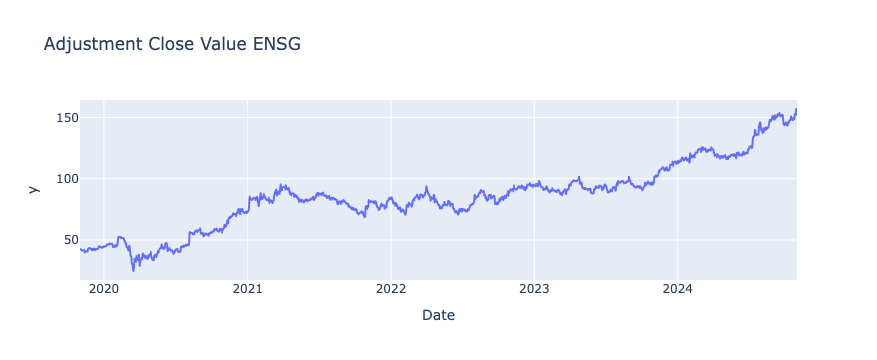

In [1482]:
#data by day in period of 5y Adjusted
fig_adj = px.line(df_ensign, x=df_ensign.index, y=df_ensign['Adj Close'].values.squeeze(), title='Adjustment Close Value ENSG')
fig_adj.show()

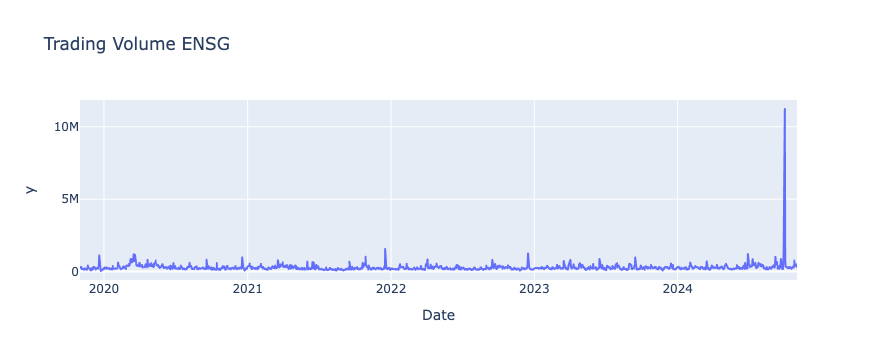

In [1484]:
#Volume anlysis
fig_volume = px.line(df_ensign, x=df_ensign.index, y=df_ensign['Volume'].values.squeeze(), title='Trading Volume ENSG')
fig_volume.show()

In [1486]:
# Summmary of data


In [1488]:
# Summmary of data

summary_stats = df_ensign[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
                      'daily_returns', 'monthly_returns', 'annual_returns', 'daily_range']].agg(['mean', 'std'])
summary_stats=summary_stats.round(3)

summary_stats.columns = [''.join(col).lower().replace('ensg', '') for col in summary_stats.columns]
summary_stats.columns = [col.replace('adj close', 'adj_close') for col in summary_stats.columns]
display(summary_stats)

,open,high,low,close,adj_close,volume,daily_returns,monthly_returns,annual_returns,daily_range
mean,85.644,86.824,84.483,85.695,85.303,286427.981,0.134,2.451,27.565,2.341
std,27.109,27.209,27.013,27.135,27.290,344907.611,2.522,8.198,20.245,1.185


In [1490]:
# Summmary of data

summary_stats = df_ensign[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
                      'daily_returns', 'monthly_returns', 'annual_returns', 'daily_range']].agg(['mean', 'std'])
summary_stats=summary_stats.round(3)

summary_stats.columns = [''.join(col).lower().replace('ensg', '') for col in summary_stats.columns]
summary_stats.columns = [col.replace('adj close', 'adj_close') for col in summary_stats.columns]
display(summary_stats)

,open,high,low,close,adj_close,volume,daily_returns,monthly_returns,annual_returns,daily_range
mean,85.644,86.824,84.483,85.695,85.303,286427.981,0.134,2.451,27.565,2.341
std,27.109,27.209,27.013,27.135,27.290,344907.611,2.522,8.198,20.245,1.185


In [1492]:
df_ensign.describe()


Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1218.000000,965.000000,1258.000000
mean,85.303221,85.694642,86.823998,84.482957,85.644380,2.864280e+05,0.134170,2.451177,27.564664,2.341041
std,27.289685,27.135188,27.209022,27.012716,27.109005,3.449076e+05,2.522260,8.197985,20.244589,1.185394
min,24.668566,24.990000,28.020000,24.059999,25.760000,4.070000e+04,-22.307882,-15.358396,12.985124,0.459999
25%,73.248722,73.702501,75.015001,72.515001,73.785000,1.857750e+05,-1.063571,-3.086792,12.985124,1.559998
50%,85.097912,85.579998,86.965000,84.305000,85.805000,2.395500e+05,0.113241,1.622347,15.430950,2.084999
75%,95.351961,95.655003,96.934999,94.537498,95.772499,3.202750e+05,1.187354,7.350518,61.427238,2.800003
max,156.910004,156.910004,158.220001,155.429993,158.100006,1.122320e+07,20.790394,27.288509,61.427238,12.190002


In [1494]:
#csv file
summary_stats.to_csv('ENSG_anlysis.csv', index=False)

In [1499]:
########################### not important #####################################

In [1501]:
# data by the end of the month
monthly_df = df_ensign.resample("ME").last()

display(monthly_df)

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
Date,,,,,,,,,,
2019-11-30 00:00:00+00:00,42.823414,43.430000,43.860001,43.340000,43.570000,76200,-0.822099,NaN,NaN,0.520000
2019-12-31 00:00:00+00:00,44.786423,45.369999,45.459999,44.230000,44.480000,232000,1.932141,4.583962,NaN,1.230000
2020-01-31 00:00:00+00:00,44.618618,45.200001,46.639999,45.029999,46.169998,203500,-2.439044,-0.374678,NaN,1.610001
2020-02-29 00:00:00+00:00,43.927624,44.500000,45.750000,43.639999,44.400002,374400,-3.113415,-0.374678,NaN,2.110001
2020-03-31 00:00:00+00:00,37.181046,37.610001,39.770000,36.709999,37.880001,587000,-1.980712,-15.358396,NaN,3.060001
2020-04-30 00:00:00+00:00,36.983322,37.410000,39.970001,37.330002,39.790001,580200,-8.196330,-0.531785,NaN,2.639999
2020-05-31 00:00:00+00:00,43.221363,43.720001,44.770000,43.450001,44.330002,511000,-2.497781,-0.531785,NaN,1.320000
2020-06-30 00:00:00+00:00,41.425774,41.849998,41.970001,40.169998,40.279999,379400,3.384380,-4.154403,NaN,1.800003


In [1503]:
##The opening price on November 30, 2019, was approximately $42.82, and by October 31, 2024, it has increased to about $154.99.
#The highest price reached was approximately $157.93 in October 2024.
#The lowest price during this period was about $36.98 in April 2020, reflecting a significant drop in the early days of the COVID-19 pandemic
#There are noticeable price swings, particularly between 2020 and 2021, where the stock rose from around $37.18 in March 2020 to a peak of $93.09 by March 2021.
#The stock showed volatility, particularly in early 2020 and in the months following, likely influenced by economic conditions and events such as the pandemic.

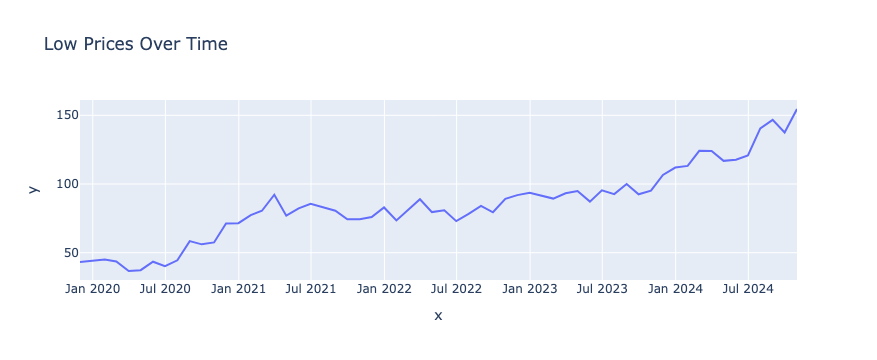

In [1505]:
#monthly
ensign_low_data = monthly_df[('Low', 'ENSG')]
fig_low_ensign = px.line(x=monthly_df.index, y=ensign_low_data, title='Low Prices Over Time')
fig_low_ensign.show()

In [1507]:

monthly_df.describe()

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
count,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,59.000000,47.000000,60.000000
mean,86.030331,86.408834,87.651500,84.989000,86.338667,5.357017e+05,-0.177018,2.667110,27.285747,2.662500
std,27.908673,27.747707,27.899796,27.346089,27.817743,1.413988e+06,2.049846,8.297116,20.309557,1.754140
min,36.983322,37.410000,39.770000,36.709999,37.880001,7.620000e+04,-8.196330,-15.358396,12.985124,0.520000
25%,74.074318,74.535000,75.517498,73.364998,74.262497,2.460750e+05,-1.360131,-3.219271,14.208037,1.755001
50%,84.672085,85.185001,86.325001,83.099998,84.315002,3.131000e+05,-0.185324,2.433255,15.430950,2.195000
75%,96.506643,96.667500,96.895000,94.969999,95.610003,4.500500e+05,1.299008,7.558584,40.157591,3.145000
max,154.990005,154.990005,157.929993,154.580002,155.300003,1.122320e+07,4.105318,27.288509,61.427238,11.810005


In [1509]:

df_ensign.index

DatetimeIndex(['2019-11-01 00:00:00+00:00', '2019-11-04 00:00:00+00:00',
               '2019-11-05 00:00:00+00:00', '2019-11-06 00:00:00+00:00',
               '2019-11-07 00:00:00+00:00', '2019-11-08 00:00:00+00:00',
               '2019-11-11 00:00:00+00:00', '2019-11-12 00:00:00+00:00',
               '2019-11-13 00:00:00+00:00', '2019-11-14 00:00:00+00:00',
               ...
               '2024-10-18 00:00:00+00:00', '2024-10-21 00:00:00+00:00',
               '2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
               '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
               '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00',
               '2024-10-30 00:00:00+00:00', '2024-10-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1258, freq=None)

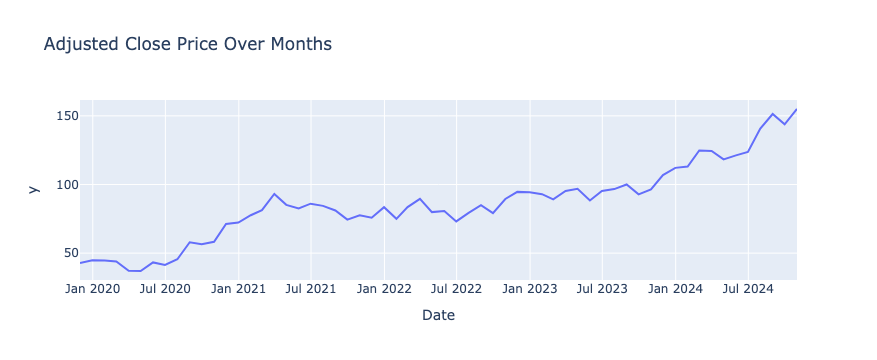

In [1511]:
#monthly Adjucted price
fig_monthly = px.line(monthly_df, x=monthly_df.index, y=monthly_df['Adj Close'].values.squeeze(), title='Adjusted Close Price Over Months')
fig_monthly.show()

In [1513]:
#monthly_df.columns

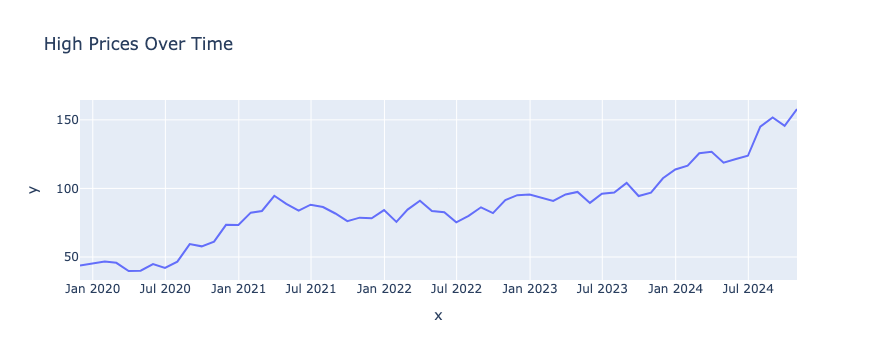

In [1515]:
#high low monthly prices
high_data = monthly_df[('High', 'ENSG')]
fig_high = px.line(x=monthly_df.index, y=high_data, title='High Prices Over Time')
fig_high.show()

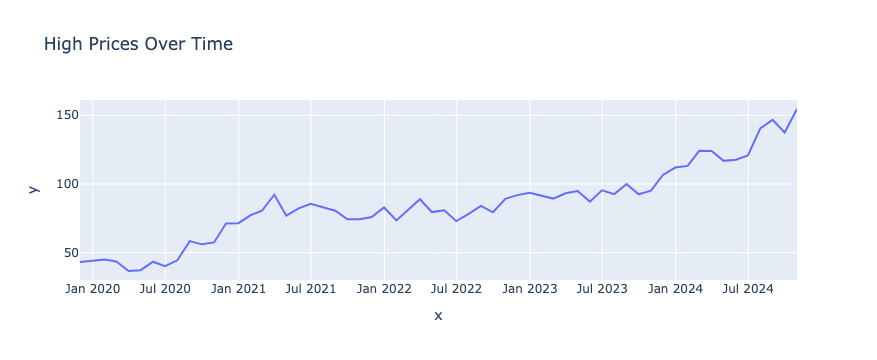

In [1517]:
low_data = monthly_df[('Low', 'ENSG')]
fig_low = px.line(x=monthly_df.index, y=low_data, title='High Prices Over Time')
fig_low.show()

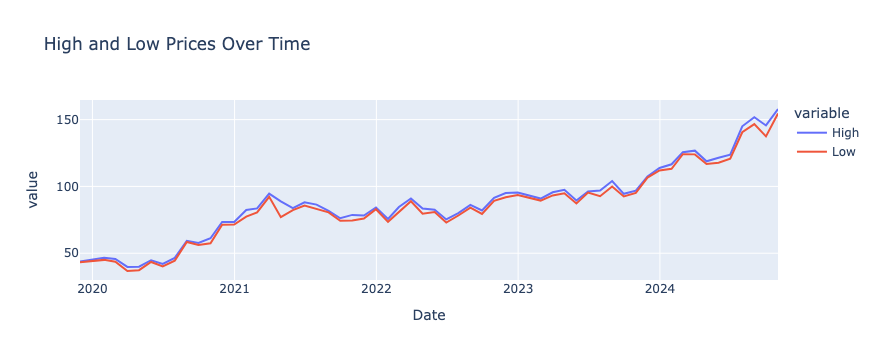

In [1519]:
#Merged High and low monthly df
merged_df = pd.DataFrame({'Date':monthly_df.index,
                         'High': high_data,
                         'Low': low_data})

fig = px.line(merged_df, x='Date', y=['High', 'Low'], title='High and Low Prices Over Time')
fig.show()

In [1521]:
#Year end data, average(mean)
year_end_df = df_ensign.resample("YE").mean()
display(year_end_df)

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
Date,,,,,,,,,,
2019-12-31 00:00:00+00:00,42.436466,43.035122,43.579756,42.458781,42.985609,233846.341463,0.117681,4.583962,NaN,1.120975
2020-12-31 00:00:00+00:00,49.920884,50.457826,51.514387,49.397431,50.419051,314638.339921,0.290758,4.954208,61.427238,2.116957
2021-12-31 00:00:00+00:00,82.435955,83.069722,84.370000,81.707222,83.035476,255346.825397,0.077888,0.672809,61.244713,2.662778
2022-12-31 00:00:00+00:00,83.185044,83.600438,84.804622,82.314900,83.574502,238649.800797,0.067543,2.440297,15.430950,2.489721
2023-12-31 00:00:00+00:00,95.743482,95.972720,96.921440,94.919560,95.929400,274635.600000,0.078466,1.128301,12.985124,2.001880
2024-12-31 00:00:00+00:00,129.632206,129.683080,130.934218,128.246683,129.562607,370747.867299,0.162090,3.144065,18.887943,2.687535


In [1523]:

print(type(year_end_df))

<class 'pandas.core.frame.DataFrame'>


In [1525]:
year_end_df.describe()

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,ENSG,ENSG,ENSG,ENSG,ENSG,ENSG,,,,
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000
mean,80.559006,80.969818,82.020737,79.840763,80.917774,281310.795813,0.132404,2.820607,33.995194,2.179974
std,31.752760,31.557635,31.736966,31.318740,31.534846,52728.049222,0.085161,1.754302,25.046639,0.590564
min,42.436466,43.035122,43.579756,42.458781,42.985609,233846.341463,0.067543,0.672809,12.985124,1.120975
25%,58.049652,58.610800,59.728291,57.474879,58.573158,242824.056947,0.078033,1.456300,15.430950,2.030649
50%,82.810499,83.335080,84.587311,82.011061,83.304989,264991.212698,0.098073,2.792181,18.887943,2.303339
75%,92.603873,92.879650,93.892235,91.768395,92.840675,304637.654941,0.150987,4.223988,61.244713,2.619514
max,129.632206,129.683080,130.934218,128.246683,129.562607,370747.867299,0.290758,4.954208,61.427238,2.687535


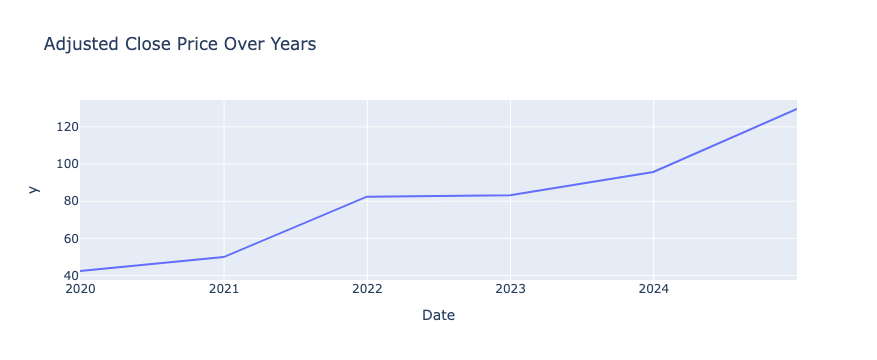

In [1527]:
###Visulaisation yearly
fig_year = px.line(year_end_df, x=year_end_df.index, y=year_end_df['Adj Close'].values.squeeze(), title='Adjusted Close Price Over Years')
fig_year.show()

# UBS

In [1530]:
ubs_ticker = "UBS"
#date range
start_date = "2019-11-01"
end_date ="2024-11-01"
#download
df_ubs = yf.download(ubs_ticker, start = start_date, end = end_date)
display(df_ubs.head())

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,UBS,UBS,UBS,UBS,UBS,UBS
Date,,,,,,
2019-11-01 00:00:00+00:00,10.145411,11.96,11.99,11.830,11.83,2261400
2019-11-04 00:00:00+00:00,10.459275,12.33,12.34,12.220,12.25,3996500
2019-11-05 00:00:00+00:00,10.493205,12.37,12.38,12.320,12.34,2392800
2019-11-06 00:00:00+00:00,10.493205,12.37,12.46,12.320,12.39,2484300
2019-11-07 00:00:00+00:00,10.620449,12.52,12.58,12.495,12.52,2463600


In [1532]:
df_ubs.index = pd.to_datetime(df_ubs.index)

# Calculate daily returns
df_ubs['daily_returns'] = df_ubs['Adj Close'].pct_change() * 100
df_ubs['daily_returns'] = df_ubs['daily_returns'].bfill()  

# Calculate monthly returns
#monthly__df.index = pd.to_datetime(monthly_df.index)
#monthly_df_ubs.index = pd.to_datetime(monthly_df_ubs.index)
monthly_df_ubs = df_ubs.resample('ME').last()  
monthly_df_ubs['monthly_returns'] = monthly_df_ubs['Adj Close'].pct_change() * 100 
# Fill monthly return back to df 
df_ubs['monthly_returns'] = monthly_df_ubs['monthly_returns'].reindex(df_ubs.index, method='ffill')

# Calculate annual returns
#annual_df_ubs.index = pd.to_datetime(annual_df_ubs.index)
annual_df_ubs = df_ubs.resample('YE').last() 
annual_df_ubs['annual_returns'] = annual_df_ubs['Adj Close'].pct_change() * 100  
# Fill annual return back to df 
df_ubs['annual_returns'] = annual_df_ubs['annual_returns'].reindex(df_ubs.index, method='ffill')


# Handle NaN values for annual returns (especially for the first year)
#annual_df['annual_returns'] = df_ensign['annual_returns'].bfill() 


# Calculate daily range
df_ubs['daily_range'] = df_ubs['High'] - df_ubs['Low']

df_ubs.tail()

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,UBS,UBS,UBS,UBS,UBS,UBS,,,,
Date,,,,,,,,,,
2024-10-25 00:00:00+00:00,32.099998,32.099998,32.365002,32.009998,32.340000,937600,-0.864739,0.487645,69.851195,0.355003
2024-10-28 00:00:00+00:00,32.389999,32.389999,32.480000,32.070000,32.099998,1363800,0.903430,0.487645,69.851195,0.410000
2024-10-29 00:00:00+00:00,32.820000,32.820000,32.895000,32.595001,32.790001,2122600,1.327571,0.487645,69.851195,0.299999
2024-10-30 00:00:00+00:00,31.350000,31.350000,31.910000,31.280001,31.565001,2864500,-4.478974,0.487645,69.851195,0.629999
2024-10-31 00:00:00+00:00,30.680000,30.680000,31.170000,30.570000,31.030001,1888800,-2.137161,-0.744094,69.851195,0.600000


In [1534]:
#date format
def format_and_round_df(df_ubs):
    df_ubs.index = pd.to_datetime(df_ubs.index)

    df_ubs = df_ubs.round(3)
    df_ubs.index = df_ubs.index.strftime('%Y-%m-%d')
    return df_ubs



display(format_and_round_df(df_ubs))

Price,Adj Close,Close,High,Low,Open,Volume,daily_returns,monthly_returns,annual_returns,daily_range
Ticker,UBS,UBS,UBS,UBS,UBS,UBS,,,,
Date,,,,,,,,,,
2019-11-01,10.145,11.96,11.990,11.830,11.830,2261400,3.094,NaN,NaN,0.160
2019-11-04,10.459,12.33,12.340,12.220,12.250,3996500,3.094,NaN,NaN,0.120
2019-11-05,10.493,12.37,12.380,12.320,12.340,2392800,0.324,NaN,NaN,0.060
2019-11-06,10.493,12.37,12.460,12.320,12.390,2484300,0.000,NaN,NaN,0.140
2019-11-07,10.620,12.52,12.580,12.495,12.520,2463600,1.213,NaN,NaN,0.085
...,...,...,...,...,...,...,...,...,...,...
2024-10-25,32.100,32.10,32.365,32.010,32.340,937600,-0.865,0.488,69.851,0.355
2024-10-28,32.390,32.39,32.480,32.070,32.100,1363800,0.903,0.488,69.851,0.410


In [1536]:
# Summmary of data UBS

summary_stats_ubs = df_ubs[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
                      'daily_returns', 'monthly_returns', 'annual_returns', 'daily_range']].agg(['mean', 'std'])
summary_stats_ubs=summary_stats_ubs.round(3)

summary_stats_ubs.columns = [''.join(col).lower().replace('ubs', '') for col in summary_stats_ubs.columns]
summary_stats_ubs.columns = [col.replace('adj close', 'adj_close') for col in summary_stats_ubs.columns]
display(summary_stats_ubs)

,open,high,low,close,adj_close,volume,daily_returns,monthly_returns,annual_returns,daily_range
mean,19.019,19.165,18.872,19.022,18.001,3051075.994,0.114,2.247,29.969,0.293
std,6.349,6.377,6.322,6.351,6.757,2115770.807,2.162,8.923,22.560,0.159


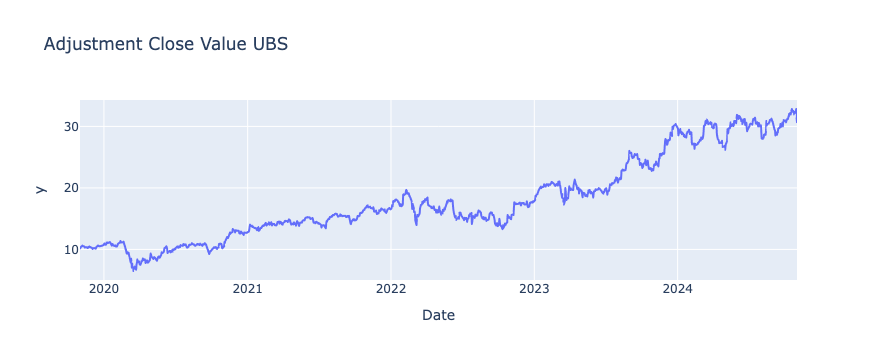

In [1550]:
fig_adj_ubs = px.line(df_ubs, x=df_ubs.index, y=df_ubs['Adj Close'].values.squeeze(), title='Adjustment Close Value UBS')
fig_adj_ubs.show()

In [1552]:
summary_stats_ubs.isnull()

,open,high,low,close,adj_close,volume,daily_returns,monthly_returns,annual_returns,daily_range
mean,False,False,False,False,False,False,False,False,False,False
std,False,False,False,False,False,False,False,False,False,False


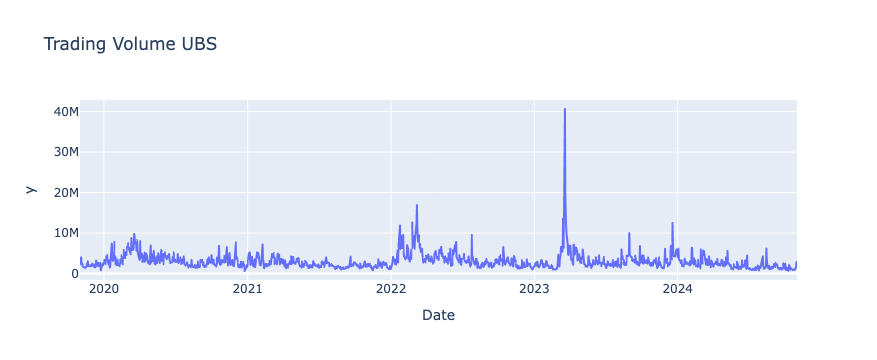

In [1554]:
fig_volume_ubs = px.line(df_ubs, x=df_ubs.index, y=df_ubs['Volume'].values.squeeze(), title='Trading Volume UBS')
fig_volume_ubs.show()

In [1557]:
summary_stats_ubs.to_csv('UBS_anlysis.csv', index=False)

In [1559]:
df_ubs.to_csv('UBS_stock_data.csv', index=True)